## Dataset Description

This dataset contains medical insurance information for **1,338 individuals**.  
It includes demographic attributes such as **age, gender, BMI, number of children, smoking status, and region**.  
The target variable is the **medical charges billed by health insurance**.

---

## Source

Kaggle – *Medical Cost Personal Dataset*

## Data Dictionary

| Column   | Description |
|----------|------------|
| age      | Age of the individual |
| sex      | Gender of the individual (male/female) |
| bmi      | Body Mass Index (BMI) |
| children | Number of dependents covered by insurance |
| smoker   | Smoking status (yes/no) |
| region   | Residential region in the US |
| charges  | Medical costs billed by health insurance |

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [2]:
# Load Dataset

df = pd.read_csv("insurance.csv")

# Display first 5 rows
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataset was successfully loaded. It contains medical insurance information for individuals including demographic and health-related attributes.

## Data Overview

In [6]:
# viewing the data types of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The data types are appropriate for analysis. Numerical variables are correctly stored as integers and floats, while categorical variables are stored as objects. No data type conversion is required.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


The dataset includes four numerical variables (age, bmi, children, charges) and three categorical variables (sex, smoker, region). All columns have complete data with no missing values.

In [7]:
# Check Missing Values
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


The dataset does not contain any missing values. All features are complete, which means no imputation or data cleaning related to null values is required. This improves the reliability of the analysis and modeling process.

In [8]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

581    True
dtype: bool

In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

np.int64(0)

One duplicate record was detected and removed to maintain data integrity and prevent potential bias in the analysis.

In [12]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (1337, 7) 

number of rows:  1337
number of columns:  7


The dataset consists of 1,337 rows and 7 columns after removing duplicate records. This dataset size is appropriate for exploratory data analysis and allows meaningful insights without computational complexity.

In [13]:
# Statistical summary
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


The average age of individuals is 39 years, indicating that the dataset mainly represents adults.
The average BMI is 30.66, which suggests that many individuals fall within the overweight category.
The average number of children is approximately 1.

Medical charges show high variability, with a mean of 13,279 and a maximum value of 63,770. The large difference between the median (9,386) and the maximum value suggests the presence of high-cost outliers and a right-skewed distribution.

## Univariate Analysis

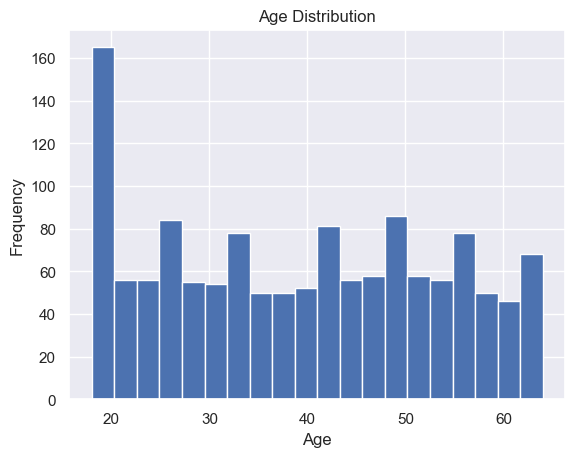

In [14]:
# Age Distribution
plt.figure()
df["age"].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

The age distribution appears relatively uniform across adult age groups between 18 and 64 years. There is no strong skewness or extreme concentration in a specific age range. This suggests that the dataset represents a balanced range of adult individuals.

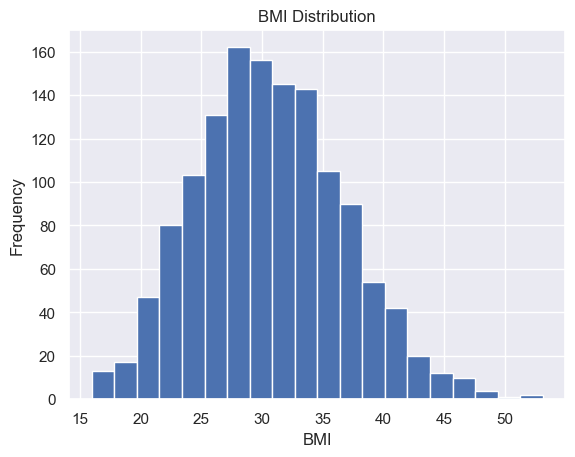

In [15]:
# BMI Distribution
plt.figure()
df["bmi"].hist(bins=20)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

The BMI distribution appears approximately normal with a slight right skew. Most individuals have BMI values between 25 and 35, indicating that a large portion of the dataset falls within the overweight range. A small number of individuals have very high BMI values, which may represent potential outliers.

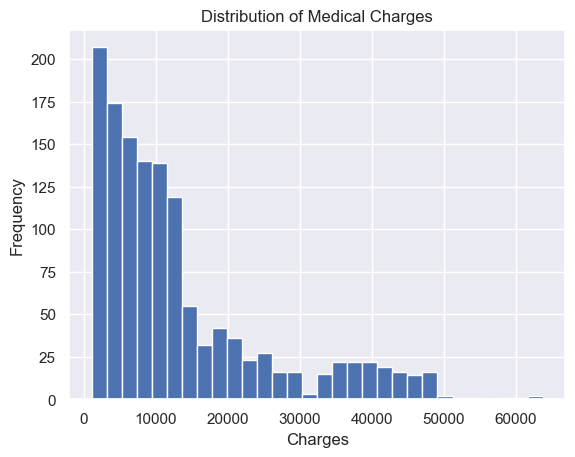

In [16]:
# Charges Distribution
plt.figure()
df["charges"].hist(bins=30)
plt.title("Distribution of Medical Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

The distribution of medical charges is highly right-skewed. Most individuals have relatively low medical expenses, while a small group has extremely high charges. The large gap between the median (9,386) and the maximum value (63,770) confirms the presence of significant outliers.

## Categorical Variables

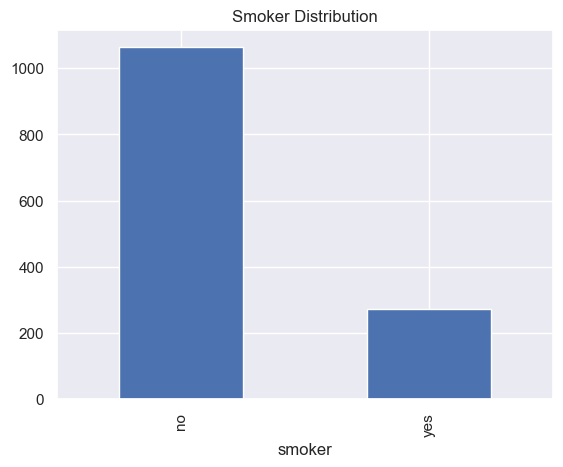

In [17]:
# Smoker Count
df["smoker"].value_counts().plot(kind="bar")
plt.title("Smoker Distribution")
plt.show()

The majority of individuals in the dataset are non-smokers, indicating an imbalance between the two categories.

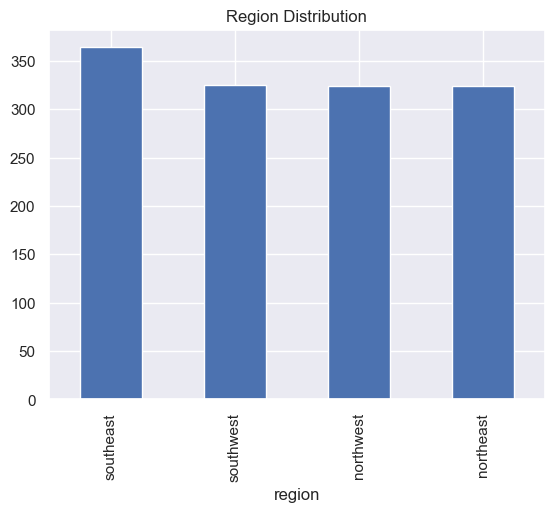

In [18]:
# Region Distribution
df["region"].value_counts().plot(kind="bar")
plt.title("Region Distribution")
plt.show()

The distribution of individuals across regions is relatively balanced, with the Southeast region having slightly more records.

## Bivariate Analysis

<Figure size 640x480 with 0 Axes>

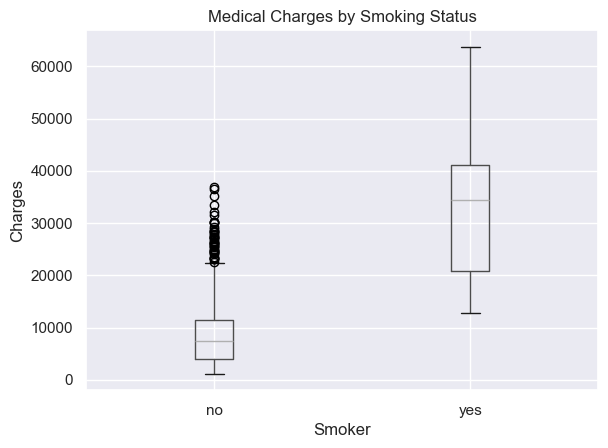

In [19]:
# Smoker vs Charges
plt.figure()
df.boxplot(column="charges", by="smoker")
plt.title("Medical Charges by Smoking Status")
plt.suptitle("")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

The boxplot clearly shows that smokers have significantly higher medical charges compared to non-smokers. The median and overall distribution of charges for smokers are substantially higher. This indicates that smoking is a major factor influencing medical insurance costs.

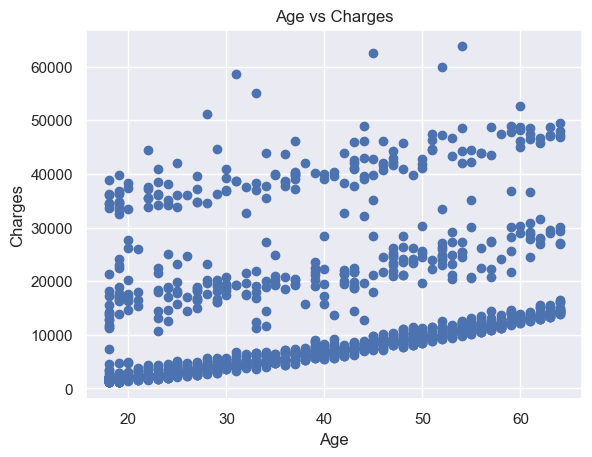

In [20]:
# Age vs Charges
plt.figure()
plt.scatter(df["age"], df["charges"])
plt.title("Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

There is a positive relationship between age and medical charges. As age increases, medical costs tend to increase.

## Correlation Matrix

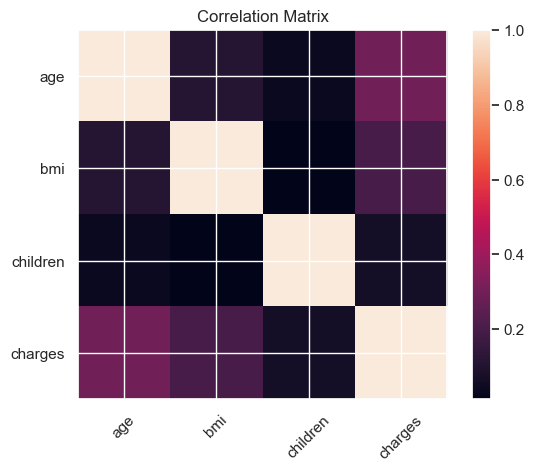

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


In [21]:
corr = df.corr(numeric_only=True)

plt.figure()
plt.imshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

corr

The correlation matrix shows that age and BMI have a positive correlation with medical charges. This indicates that as age and BMI increase, medical costs tend to increase. However, the number of children shows a weak correlation with charges, suggesting minimal impact on insurance costs.

## Conclusion

In this exploratory data analysis, the dataset was examined for structure, quality, and patterns. The data was found to be clean, with no missing values and only one duplicate record, which was removed.

The analysis revealed that medical charges are highly right-skewed, with a small group of individuals incurring significantly higher costs. Smoking status emerged as the strongest factor influencing medical charges, as smokers consistently showed substantially higher insurance costs compared to non-smokers.

Additionally, age and BMI demonstrated positive relationships with medical charges, indicating that older individuals and those with higher BMI tend to incur higher medical expenses. The dataset is well-structured and suitable for further predictive modeling.